In [180]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import os
import numpy as np
import matplotlib.pyplot as plt
import json
import requests

In [258]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [259]:
train_images = train_images.reshape(60000, 784).astype("float32")/255
test_images = test_images.reshape(10000, 784).astype("float32")/255

In [260]:
inputs = keras.Input(shape=(784,))
layer_1 = layers.Dense(128, activation="relu")(inputs)
layer_2 = layers.Dropout(0.2)(layer_1)
layer_3 = layers.Dense(128, activation="relu")(layer_2)
outputs = layers.Dense(10, activation="softmax")(layer_3)

2021-12-16 17:13:14.834430: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-16 17:13:14.837744: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [261]:
model = keras.Model(inputs=inputs, outputs=outputs)

In [262]:
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [263]:
model.fit(train_images, train_labels, batch_size=128, epochs=5)

2021-12-16 17:13:18.461048: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5657 - accuracy: 0.8360
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1625 - accuracy: 0.9509
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1174 - accuracy: 0.9642
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0943 - accuracy: 0.9710
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0847 - accuracy: 0.9745


In [264]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 499us/step - loss: 0.0849 - accuracy: 0.9744


[0.0849296823143959, 0.974399983882904]

In [ ]:
model_version = "0001"

In [ ]:
model_name = "digits"

In [ ]:
model_path = os.path.join(model_name, model_version)

model_path

In [ ]:
print(model_path)

In [ ]:
model.save(model_path)

In [ ]:
model = keras.models.load_model(model_path)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.imshow(test_images[0].reshape([784]))

In [ ]:
model.predict(test_images[0].reshape([784, 1]))

In [ ]:
model.predict(test_images[0].reshape([1, 784])).argmax()

In [ ]:
model = keras.models.load_model(model_path)

In [ ]:
model.predict(test_images[1].reshape([1, 784])).argmax()

In [ ]:
plt.imshow(test_images[1].reshape([28, 28]))

In [348]:
image = tf.keras.preprocessing.image.load_img("img.png", color_mode="grayscale", )

In [350]:
image = np.array(image).astype("float32") / 255

In [353]:
image = image.reshape([28, 28, 1])
image.shape

(28, 28, 1)

In [338]:
image = 1 - image

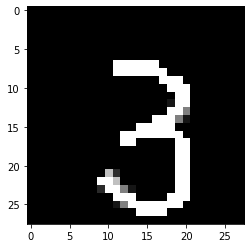

In [354]:
plt.imshow(image.reshape([28, 28]), cmap="gray")

In [126]:
digit = np.load("digit.npy")

In [329]:
image = image.reshape([1, 784])

In [296]:
image

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 

In [252]:
inpt = json.dumps({
    "signature_name": "serving_default",
    "instances": image.tolist(),
})

In [132]:
inpt

'{"signature_name": "serving_default", "instances": [[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255], [255, 255, 255, 255, 255, 252, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,

In [253]:
SERVER_URL = 'http://localhost:8501/v1/models/model:predict'

In [254]:
response = requests.post(SERVER_URL, inpt)

In [255]:
response = response.json()

In [256]:
response

{'predictions': [[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]]}

In [334]:
model.predict(image)

array([[0.00667947, 0.16227639, 0.0310238 , 0.14479601, 0.21272942,
        0.06846621, 0.07138547, 0.08639406, 0.14048943, 0.07575964]],
      dtype=float32)

In [333]:
model = keras.models.load_model("digits/0001")

In [331]:
image = image.astype("float32")

In [318]:
image

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 